# 概要
## データの読み込み、前処理
+ NIIのIRDBの統計データを取得

In [1]:
import pandas as pd
# df = pd.read_excel('2022irdb.xlsx', index_col=0)
df = pd.read_csv('2022irdb.csv', index_col=0)
print(df)

                  機関名                     リポジトリ名   対象年  対象月    総件数  本文あり件数  \
タイトル                                                                         
2022年01月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    1  11319   11230   
2022年02月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    2  11346   11262   
2022年03月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    3  11515   11358   
2022年04月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    4  11562   11477   
2022年05月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    5  11631   11542   
...               ...                        ...   ...  ...    ...     ...   
2022年07月   地球環境戦略研究機関  地球環境戦略研究機関(IGES) 出版物リポジトリ  2022    7   1735     956   
2022年08月   地球環境戦略研究機関  地球環境戦略研究機関(IGES) 出版物リポジトリ  2022    8   1747     963   
2022年07月  東京国際工科専門職大学           東京国際工科専門職大学リポジトリ  2022    7      0       0   
2022年08月  東京国際工科専門職大学           東京国際工科専門職大学リポジトリ  2022    8     14      14   
2022年08月       新潟薬科大学                新潟薬科大学リポジトリ  2022    8     

In [2]:
df2205 = df.loc['2022年05月']
df2205.tail(2)


,機関名,リポジトリ名,対象年,対象月,総件数,本文あり件数,DOI付与件数,embargoed access(全件数),metadata only access(全件数),restricted access(全件数),...,research proposal(本文あり),software(本文あり).1,technical documentation(本文あり),workflow(本文あり),data management plan(本文あり),interview(本文あり),manuscript(本文あり),newspaper(本文あり),software paper(本文あり),other(本文あり)
タイトル,,,,,,,,,,,,,,,,,,,,,
2022年05月,高知学園大学,高知学園大学・高知学園短期大学学術機関リポジトリ,2022,5,32,32,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022年05月,同志社大学,同志社大学デジタルコレクション,2022,5,902,902,0,0,0,0,...,0,0,0,0,0,0,26,0,0,0


In [3]:
df2205i = df2205.set_index('機関名')
print(df2205i)

                                 リポジトリ名   対象年  対象月    総件数  本文あり件数  DOI付与件数  \
機関名                                                                          
横浜国立大学                  横浜国立大学学術情報リポジトリ  2022    5  11631   11542     1911   
横浜商科大学                    横浜商科大学機関リポジトリ  2022    5   1533    1533        0   
横浜市立大学                  横浜市立大学学術機関リポジトリ  2022    5   2088    2062      546   
安田女子大学                      安田女子大学リポジトリ  2022    5    538     538      537   
山梨県立大学                    山梨県立大学機関リポジトリ  2022    5   1362    1362        0   
...                                 ...   ...  ...    ...     ...      ...   
静岡県立農林環境専門職大学        静岡県立農林環境専門職大学リポジトリ  2022    5     21      21        0   
産業技術短期大学                  産業技術短期大学リポジトリ  2022    5     25      25        0   
一宮研伸大学                      一宮研伸大学リポジトリ  2022    5      8       8        0   
高知学園大学         高知学園大学・高知学園短期大学学術機関リポジトリ  2022    5     32      32        6   
同志社大学                   同志社大学デジタルコレクション  2022    5    902     90

In [4]:
# df2205iを全件数と、本文ありとに分ける
# print(df2205i.iloc[:,17:64].columns)
# print(df2205i.iloc[:,75:].columns)
df2205_all = df2205i.iloc[:,17:64]
df2205_honbun = df2205i.iloc[:,75:]

df2205_all.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
       
df2205_honbun.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
# df2205_all.tail(2)
# df2205_honbun.tail(2)
# 全体-本文の差分（メタデータのみ）
df2205_sabun = df2205_all - df2205_honbun
df2205_sabun.describe()        # sample(5)


,conference paper,data paper,departmental bulletin paper,editorial,journal article,periodical,review article,article,book,book part,...,research proposal,software,technical documentation,workflow,data management plan,interview,manuscript,newspaper,software paper,other
count,775.000000,775.000000,775.000000,775.0,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.0,775.000000,775.0,775.0,775.0,775.0,775.0,775.0,775.0,775.000000
mean,189.076129,0.001290,221.301935,0.0,280.781935,1.894194,0.002581,93.966452,21.023226,0.006452,...,0.0,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.281290
std,4687.029182,0.035921,903.911428,0.0,5091.223845,37.274374,0.071842,1883.259014,456.463806,0.179605,...,0.0,0.359211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621.473487
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,21.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,130072.000000,1.000000,12329.000000,0.0,140152.000000,752.000000,2.000000,51225.000000,12676.000000,5.000000,...,0.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9351.000000


# 主成分分析をしてみる
https://corvus-window.com/python_pca/

In [5]:
# 主成分分析の前処理
# df2205_all.head(3)
# print(df2205_all.dropna(how='all', axis=1))
# 分散 var() 標準偏差 std()
# print(df2205_all.var())
print(df2205_all.var(axis=0)>0)


conference paper                True
data paper                      True
departmental bulletin paper     True
editorial                       True
journal article                 True
periodical                      True
review article                  True
article                         True
book                            True
book part                       True
cartographic material           True
map                            False
conference object               True
conference proceedings          True
conference poster               True
dataset                         True
image                           True
still image                     True
moving image                   False
video                          False
lecture                         True
patent                         False
internal report                False
report                          True
research report                 True
technical report                True
policy report                  False
r

In [ ]:
# 特徴量の確認（相関行列、散布図）
# 相関行列や散布図を用いて特徴量の分布などを確認していきます。
# ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 相関行列
correlation_coefficients = df2205_all.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

In [ ]:
# 行・列ごとに欠損値の個数をカウント
# print(df2205_all.isnull().sum(axis=0))
df2205_all.dropna(how='all', axis=0, inplace=True)

In [6]:
# 変数の標準化
df2205_all_std = df2205_all.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df2205_all_std.sample(3)


,conference paper,data paper,departmental bulletin paper,editorial,journal article,periodical,review article,article,book,book part,...,research proposal,software,technical documentation,workflow,data management plan,interview,manuscript,newspaper,software paper,other
機関名,,,,,,,,,,,,,,,,,,,,,
広島都市学園大学,-0.050041,-0.035921,-0.327254,-0.035921,-0.120981,-0.058915,-0.053003,-0.081286,-0.121451,-0.062869,...,NaN,-0.0702,-0.035921,NaN,NaN,-0.048218,-0.041886,-0.035921,NaN,-0.252421
都留文科大学,-0.050041,-0.035921,-0.215330,-0.035921,-0.123618,-0.058915,-0.053003,-0.088019,-0.121451,-0.062869,...,NaN,-0.0702,-0.035921,NaN,NaN,-0.048218,-0.041886,-0.035921,NaN,-0.238254
群馬県立女子大学,-0.050041,-0.035921,-0.317448,-0.035921,-0.131351,-0.058915,-0.053003,-0.088019,-0.121451,-0.062869,...,NaN,-0.0702,-0.035921,NaN,NaN,-0.048218,-0.041886,-0.035921,NaN,-0.252421


In [9]:
#いったんとめる
df2205_all_std.dropna(how='all', axis=1, inplace=True)

In [10]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  
# 主成分分析の実行
pca = PCA()
pca.fit(df2205_all_std)

# データを主成分に変換
pca_row = pca.transform(df2205_all_std)
pca_row


array([[ 6.34928622e-02,  4.51385838e-01, -5.89421178e-01, ...,
        -5.15792926e-17,  1.64087329e-16, -3.39611194e-16],
       [-2.20722527e-01, -2.66077790e-01,  1.54712395e-01, ...,
        -1.61806295e-16, -3.28967297e-17,  4.42293547e-17],
       [-2.08665859e-01, -1.88006450e-01,  7.51356394e-02, ...,
        -1.58926938e-16, -8.65212619e-17, -4.13346608e-17],
       ...,
       [-2.55087592e-01, -3.76507977e-01,  2.36272208e-01, ...,
        -1.37909966e-16, -1.82538461e-16,  9.77150199e-18],
       [-2.54504459e-01, -3.75453044e-01,  2.35711310e-01, ...,
        -1.37909966e-16, -1.82538461e-16,  9.77150199e-18],
       [ 1.24406855e+00, -5.74651193e-01, -2.38945450e-02, ...,
        -1.13280776e-15,  1.89782867e-15,  1.32729398e-15]])

In [19]:
# 主成分得点
pd.DataFrame(pca_row, columns=["PC{}".format(x + 1)
             for x in range(len(df2205_all_std.columns))]).describe()
             #.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
count,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,...,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02
mean,8.681228e-17,-1.140306e-16,1.164481e-16,-7.606818e-17,-3.438110e-17,-2.062866e-17,-8.129698e-17,2.635884e-17,2.030634e-17,1.181850e-17,...,-8.755205e-18,-9.977256e-18,-1.691945e-17,-2.114072e-17,-8.575067e-19,-4.476651e-18,3.776199e-18,-1.065443e-17,-1.011640e-17,-4.572978e-18
std,3.283852e+00,1.878618e+00,1.766472e+00,1.535310e+00,1.497516e+00,1.408740e+00,1.369136e+00,1.330449e+00,1.085513e+00,1.027594e+00,...,9.417111e-04,1.309596e-15,1.603954e-15,8.761550e-16,6.793828e-16,7.336854e-16,9.705055e-16,1.256915e-15,9.506834e-16,5.483221e-16
min,-2.551787e-01,-1.100826e+01,-2.703483e+01,-1.981315e+01,-1.657708e+01,-5.617161e+00,-9.758818e+00,-1.919185e+01,-7.144982e+00,-7.143267e+00,...,-4.343958e-03,-7.395168e-15,-1.035022e-14,-1.420232e-14,-4.814326e-15,-8.669107e-15,-1.999762e-14,-1.132808e-15,-8.390316e-15,-6.264054e-15
25%,-2.492757e-01,-3.631093e-01,8.528083e-02,-1.183938e-02,-1.038373e-02,-5.325722e-02,-6.147035e-02,-5.914589e-02,-8.758856e-02,-8.211263e-02,...,-4.027013e-05,-1.441662e-16,-5.028228e-17,3.279421e-17,-3.480624e-17,3.387162e-17,1.020871e-16,-1.607425e-16,-1.825385e-16,-2.887250e-17
50%,-2.360366e-01,-3.312478e-01,2.006141e-01,7.231263e-03,8.054481e-02,-5.270365e-02,-5.464570e-02,-3.776434e-02,-7.866974e-02,-8.113849e-02,...,4.469386e-05,-2.989111e-17,4.560899e-17,8.453833e-17,1.808557e-17,7.989964e-17,1.357715e-16,-1.448489e-16,-1.748271e-16,2.832608e-18
75%,-1.921434e-01,-1.930374e-01,2.259972e-01,1.286958e-02,1.052168e-01,-4.951067e-02,-3.070375e-02,3.431683e-02,-7.548874e-02,-7.227002e-02,...,7.898546e-05,7.363544e-18,7.599102e-17,1.001839e-16,3.222616e-17,9.377743e-17,1.458329e-16,-1.379100e-16,-1.079828e-16,9.771502e-18
max,8.791387e+01,3.165971e+01,2.986924e+01,3.444059e+01,2.453363e+01,3.789089e+01,3.314669e+01,1.928949e+01,2.009512e+01,1.594837e+01,...,2.413084e-02,2.513279e-14,4.125514e-14,1.027035e-14,1.100078e-14,6.149309e-15,3.642123e-15,2.970943e-14,1.681180e-14,7.790371e-15


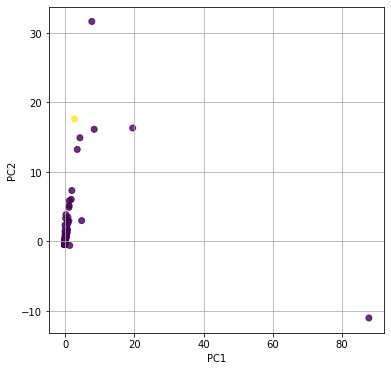

In [16]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8, c=list(df2205_all_std.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


        PC1       PC2       PC3       PC4       PC5       PC6      PC7  \
0  0.299547  0.098034  0.086678  0.065477  0.062293  0.055126  0.05207   

        PC8       PC9      PC10  ...          PC27          PC28  \
0  0.049169  0.032732  0.029332  ...  2.463388e-08  1.013551e-31   

           PC29          PC30          PC31          PC32          PC33  \
0  6.437105e-33  3.849072e-33  3.458143e-33  1.337561e-33  1.337561e-33   

           PC34          PC35          PC36  
0  1.337561e-33  4.648051e-34  2.005216e-34  

[1 rows x 36 columns]


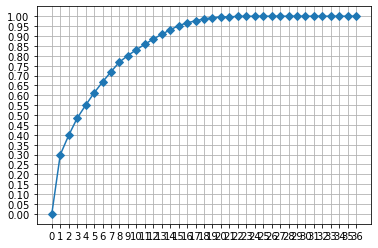

In [12]:
# 寄与率を求める
pca_col = ["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(37))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

第1主成分の寄与率は，0.299547 であることが分かります．また，累積寄与率は表現したグラフから第9主成分までで約80％の情報を説明できているということが分かります．

一般的には，累積寄与率が80％以上になる主成分数を採用して分析結果に用いることが多いです80％以上を目安に主成分を選択します．

② 主成分負荷量を求める

主成分負荷量とは，各主成分に対する各変数の影響度合いになります．-1から1の間の値を取り，絶対値が大きいほど影響度が大きくなります．主成分負荷量を求めることで，各主成分が何を意味しているかが分かりやすくなります

In [20]:
pca_row

array([[ 6.34928622e-02,  4.51385838e-01, -5.89421178e-01, ...,
        -5.15792926e-17,  1.64087329e-16, -3.39611194e-16],
       [-2.20722527e-01, -2.66077790e-01,  1.54712395e-01, ...,
        -1.61806295e-16, -3.28967297e-17,  4.42293547e-17],
       [-2.08665859e-01, -1.88006450e-01,  7.51356394e-02, ...,
        -1.58926938e-16, -8.65212619e-17, -4.13346608e-17],
       ...,
       [-2.55087592e-01, -3.76507977e-01,  2.36272208e-01, ...,
        -1.37909966e-16, -1.82538461e-16,  9.77150199e-18],
       [-2.54504459e-01, -3.75453044e-01,  2.35711310e-01, ...,
        -1.37909966e-16, -1.82538461e-16,  9.77150199e-18],
       [ 1.24406855e+00, -5.74651193e-01, -2.38945450e-02, ...,
        -1.13280776e-15,  1.89782867e-15,  1.32729398e-15]])

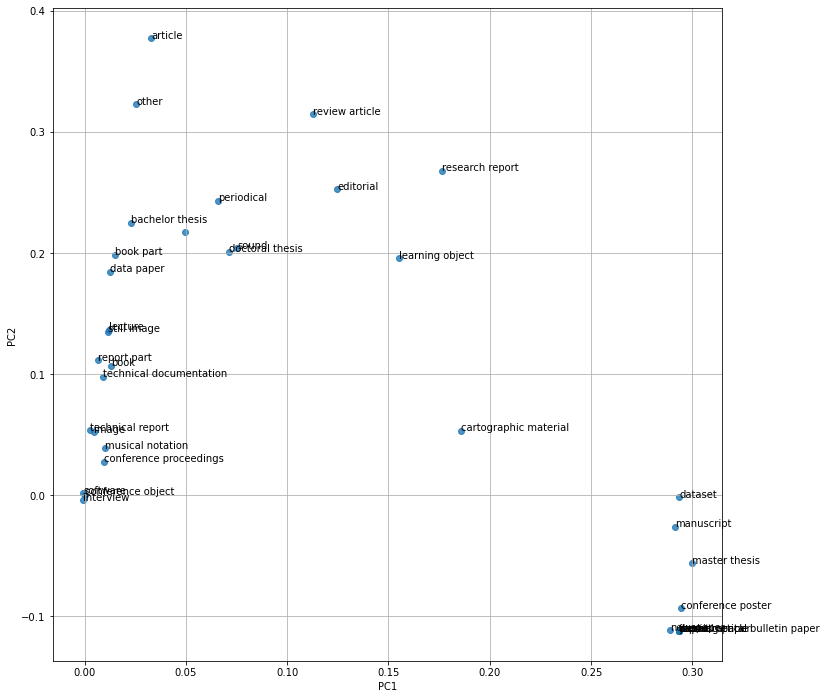

In [35]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
# 第一主成分と第二主成分における観測変数の寄与度をプロットすることにより、各成分が何を考慮した値なのかのヒントが得られます。
plt.figure(figsize=(12, 12))
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_std.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


第1主成分に対して主成分負荷量が大きい項目は，dataset manuscript master thesis conference paper departmental bulletin paper...であることがわかります．

In [65]:
len(df2205_all_std.columns) # 36
std_index = df2205_all_std.index.to_list()
# PCA の固有ベクトル
# pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
# 主成分得点
pca_tokuten = pd.DataFrame(pca_row, columns=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
pca_tokuten['index'] = std_index
pca_tokuten.set_index('index', inplace=True)
pca_tokuten.head()
# pca_tokuten.describe()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
index,,,,,,,,,,,,,,,,,,,,,
横浜国立大学,0.063493,0.451386,-0.589421,-0.077360,-0.290432,-0.021138,-0.009577,0.457752,-0.184785,-0.083280,...,0.000292,-4.956936e-16,-2.684854e-16,-2.314460e-16,-6.422067e-17,-1.119115e-16,-3.742300e-16,-5.157929e-17,1.640873e-16,-3.396112e-16
横浜商科大学,-0.220723,-0.266078,0.154712,0.027292,-0.035426,-0.043050,-0.035959,0.013452,-0.087218,-0.060302,...,0.000042,-1.734575e-16,1.369046e-17,9.312540e-17,-3.391748e-17,1.016330e-16,1.485271e-16,-1.618063e-16,-3.289673e-17,4.422935e-17
横浜市立大学,-0.208666,-0.188006,0.075136,-0.089334,-0.040199,-0.027147,-0.101595,-0.066447,-0.034172,-0.045839,...,-0.000099,-1.038764e-16,2.321194e-17,5.083075e-17,9.237308e-17,7.536110e-17,1.676567e-16,-1.589269e-16,-8.652126e-17,-4.133466e-17
安田女子大学,-0.243153,-0.353072,0.218881,0.001206,0.087753,-0.052968,-0.054288,-0.039049,-0.080592,-0.082419,...,0.000025,-4.029945e-17,3.209813e-17,7.759944e-17,1.834837e-17,6.602185e-17,1.338972e-16,-1.512457e-16,-1.834058e-16,-4.106286e-18
山梨県立大学,-0.231044,-0.321040,0.188734,-0.006892,0.071872,-0.057910,-0.014699,-0.029488,-0.082155,-0.085219,...,-0.000049,-9.033593e-17,-3.896380e-17,4.308811e-17,-2.346019e-17,4.548087e-17,1.073939e-16,-1.656827e-16,-1.539492e-16,-2.457637e-17


In [67]:
pca_row

array([[ 6.34928622e-02,  4.51385838e-01, -5.89421178e-01, ...,
        -5.15792926e-17,  1.64087329e-16, -3.39611194e-16],
       [-2.20722527e-01, -2.66077790e-01,  1.54712395e-01, ...,
        -1.61806295e-16, -3.28967297e-17,  4.42293547e-17],
       [-2.08665859e-01, -1.88006450e-01,  7.51356394e-02, ...,
        -1.58926938e-16, -8.65212619e-17, -4.13346608e-17],
       ...,
       [-2.55087592e-01, -3.76507977e-01,  2.36272208e-01, ...,
        -1.37909966e-16, -1.82538461e-16,  9.77150199e-18],
       [-2.54504459e-01, -3.75453044e-01,  2.35711310e-01, ...,
        -1.37909966e-16, -1.82538461e-16,  9.77150199e-18],
       [ 1.24406855e+00, -5.74651193e-01, -2.38945450e-02, ...,
        -1.13280776e-15,  1.89782867e-15,  1.32729398e-15]])

In [1]:
plt.rcParams["font.family"] = "Meiryo"
# 主成分得点を求める
fig, ax = plt.subplots()
pca_tokuten.plot(0,1,kind='scatter',ax=ax)

plt.figure(figsize=(12,12))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")


for k, v in pca_tokuten.iterrows():
             plt.annotate(k,xy=(v[0],v[1]),size=8)

NameError: name 'plt' is not defined

      conference paper  data paper  departmental bulletin paper  editorial  \
PC1       1.233106e-02    0.293224                 1.246198e-01   0.293224   
PC2       1.844542e-01   -0.112189                 2.525667e-01  -0.112189   
PC3      -3.169745e-01    0.029287                -1.851826e-01   0.029287   
PC4       1.056214e-01    0.023828                -1.275860e-01   0.023828   
PC5       3.913078e-01    0.064683                -2.723121e-01   0.064683   
PC6      -4.163564e-02   -0.004398                 3.593982e-03  -0.004398   
PC7      -1.869589e-01   -0.017137                 8.675414e-02  -0.017137   
PC8      -1.045861e-01   -0.057993                 2.934559e-01  -0.057993   
PC9      -8.211601e-02    0.036836                -4.996259e-02   0.036836   
PC10     -3.927511e-02    0.008495                -7.092983e-03   0.008495   
PC11      3.333081e-03   -0.005120                -1.266667e-03  -0.005120   
PC12      1.898390e-02    0.034561                -1.940546e-02 

ValueError: x and y must be the same size

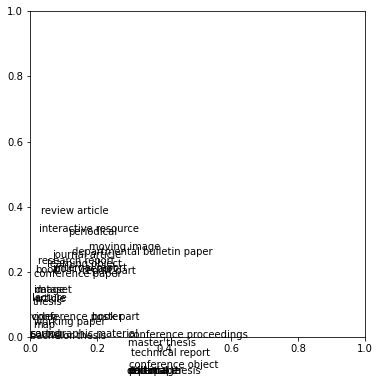

In [ ]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns=pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=df2205_all_std.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

print(pca.components_[0])
print(pca.components_)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ValueError: Shape of passed values is (36, 36), indices imply (36, 47)
# TypeError: only size-1 arrays can be converted to Python scalars 
# plt.scatter(pca.components_[0], pca.components_)


# 47個の資源タイプを、大項目13個にまとめる

In [ ]:
# 列をまとめる
df2205_all['Kiyou'] = df2205_all['departmental bulletin paper']

df2205_all['Article'] =  df2205_all['conference paper']
+df2205_all['data paper']
+df2205_all['editorial']
+df2205_all['journal article']
+df2205_all['newspaper']
+df2205_all['periodical']
+df2205_all['review article']
+df2205_all['software paper']
+df2205_all['article']

df2205_all['Book'] = df2205_all['book']
+df2205_all['book part']

df2205_all['Cartographic Material'] = df2205_all['cartographic material']
+df2205_all['map']

df2205_all['Conference object'] = df2205_all['conference object']
+df2205_all['conference proceedings']
+df2205_all['conference poster']

df2205_all['Dataset'] = df2205_all['dataset']
+df2205_all['interview']

df2205_all['Image'] = df2205_all['image']
+df2205_all['still image']
+df2205_all['moving image']
+df2205_all['video']

df2205_all['Lecture'] = df2205_all['lecture']
df2205_all['Patent'] = df2205_all['patent']

df2205_all['Report'] = df2205_all['internal report']
+df2205_all['report']
+df2205_all['research report']
+df2205_all['technical report']
+df2205_all['policy report']
+df2205_all['report part']
+df2205_all['working paper']
+df2205_all['data management plan']

df2205_all['Sound'] = df2205_all['sound']

df2205_all['Thesis'] = df2205_all['thesis']
+df2205_all['bachelor thesis']
+df2205_all['master thesis']
+df2205_all['doctoral thesis']

df2205_all['Multiple'] = df2205_all['interactive resource']
+df2205_all['learning object']
+df2205_all['manuscript']
+df2205_all['musical notation']
+df2205_all['research proposal']
+df2205_all['software']
+df2205_all['technical documentation']
+df2205_all['workflow']
+df2205_all['other']

In [ ]:
# 列をまとめる
df2205_honbun['Kiyou'] = df2205_honbun['departmental bulletin paper']

df2205_honbun['Article'] = df2205_honbun['conference paper']
+df2205_honbun['data paper']
+df2205_honbun['editorial']
+df2205_honbun['journal article']
+df2205_honbun['newspaper']
+df2205_honbun['periodical']
+df2205_honbun['review article']
+df2205_honbun['software paper']
+df2205_honbun['article']

df2205_honbun['Book'] = df2205_honbun['book']
+df2205_honbun['book part']

df2205_honbun['Cartographic Material'] = df2205_honbun['cartographic material']
+df2205_honbun['map']

df2205_honbun['Conference object'] = df2205_honbun['conference object']
+df2205_honbun['conference proceedings']
+df2205_honbun['conference poster']

df2205_honbun['Dataset'] = df2205_honbun['dataset']
+df2205_honbun['interview']

df2205_honbun['Image'] = df2205_honbun['image']
+df2205_honbun['still image']
+df2205_honbun['moving image']
+df2205_honbun['video']

df2205_honbun['Lecture'] = df2205_honbun['lecture']
df2205_honbun['Patent'] = df2205_honbun['patent']

df2205_honbun['Report'] = df2205_honbun['internal report']
+df2205_honbun['report']
+df2205_honbun['research report']
+df2205_honbun['technical report']
+df2205_honbun['policy report']
+df2205_honbun['report part']
+df2205_honbun['working paper']
+df2205_honbun['data management plan']

df2205_honbun['Sound'] = df2205_honbun['sound']

df2205_honbun['Thesis'] = df2205_honbun['thesis']
+df2205_honbun['bachelor thesis']
+df2205_honbun['master thesis']
+df2205_honbun['doctoral thesis']

df2205_honbun['Multiple'] = df2205_honbun['interactive resource']
+df2205_honbun['learning object']
+df2205_honbun['manuscript']
+df2205_honbun['musical notation']
+df2205_honbun['research proposal']
+df2205_honbun['software']
+df2205_honbun['technical documentation']
+df2205_honbun['workflow']
+df2205_honbun['other']


In [ ]:
# 列をまとめる
df2205_sabun['Kiyou'] = df2205_sabun['departmental bulletin paper']

df2205_sabun['Article'] =  df2205_sabun['conference paper']
+df2205_sabun['data paper']
+df2205_sabun['editorial']
+df2205_sabun['journal article']
+df2205_sabun['newspaper']
+df2205_sabun['periodical']
+df2205_sabun['review article']
+df2205_sabun['software paper']
+df2205_sabun['article']

df2205_sabun['Book'] = df2205_sabun['book']
+df2205_sabun['book part']

df2205_sabun['Cartographic Material'] = df2205_sabun['cartographic material']
+df2205_sabun['map']

df2205_sabun['Conference object'] = df2205_sabun['conference object']
+df2205_sabun['conference proceedings']
+df2205_sabun['conference poster']

df2205_sabun['Dataset'] = df2205_sabun['dataset']
+df2205_sabun['interview']

df2205_sabun['Image'] = df2205_sabun['image']
+df2205_sabun['still image']
+df2205_sabun['moving image']
+df2205_sabun['video']

df2205_sabun['Lecture'] = df2205_sabun['lecture']
df2205_sabun['Patent'] = df2205_sabun['patent']

df2205_sabun['Report'] = df2205_sabun['internal report']
+df2205_sabun['report']
+df2205_sabun['research report']
+df2205_sabun['technical report']
+df2205_sabun['policy report']
+df2205_sabun['report part']
+df2205_sabun['working paper']
+df2205_sabun['data management plan']

df2205_sabun['Sound'] = df2205_sabun['sound']

df2205_sabun['Thesis'] = df2205_sabun['thesis']
+df2205_sabun['bachelor thesis']
+df2205_sabun['master thesis']
+df2205_sabun['doctoral thesis']

df2205_sabun['Multiple'] = df2205_sabun['interactive resource']
+df2205_sabun['learning object']
+df2205_sabun['manuscript']
+df2205_sabun['musical notation']
+df2205_sabun['research proposal']
+df2205_sabun['software']
+df2205_sabun['technical documentation']
+df2205_sabun['workflow']
+df2205_sabun['other']

In [ ]:
# 13項目にまとめる
df2205_all_d = df2205_all.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_honbun_d = df2205_honbun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video', 'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_sabun_d = df2205_sabun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                    'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
print(df2205_sabun_d)
print(df2205_honbun_d)
# print(df2205_all_d)


In [ ]:
df2205_all_d.drop(['Total'], axis=1, inplace=True)
df2205_honbun_d.drop(['Total'], axis=1, inplace=True)
df2205_sabun_d.drop(['Total'], axis=1, inplace=True)

In [ ]:
# Total列を追加
df2205_all_d = pd.concat([df2205_all_d, pd.DataFrame(
    df2205_all_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_honbun_d = pd.concat([df2205_honbun_d, pd.DataFrame(
    df2205_honbun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_sabun_d = pd.concat([df2205_sabun_d, pd.DataFrame(
    df2205_sabun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_all_d
# Totalの降順にソートする
df2205_all_d = df2205_all_d.sort_values(by='Total', ascending=False)
df2205_honbun_d = df2205_honbun_d.sort_values(by='Total', ascending=False)
df2205_sabun_d = df2205_sabun_d.sort_values(by='Total', ascending=False)
# df2205i_sabun_d

In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df2205_all_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（全件数）',)\
     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205_honbun_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（本文あり）',)\
     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205_sabun_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（メタデータのみ）',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
# 全てでグラフを描くと32.7s
# df2205i_all_d3.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',).legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)



In [ ]:
# 行ごとの百分率に変換する
df2205i_all_d4 = df2205i_all_d3.div(
    df2205i_all_d3['Total'], axis=0).mul(100)  # .round(2) 四捨五入
# 判例の位置調整　https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
#df2205i_all_d4.iloc[:50, ].drop("Total", axis=1)\
#    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205i_all_d4.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# Kiyouの降順にソートする
df2205i_all_d5 = df2205i_all_d4.sort_values(by='Kiyou', ascending=False)
df2205i_all_d5.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='資料タイプ別百分率',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 特徴量スケーリング（正規化）
import numpy as np

df2205i_all_d3.head()

# Min-Max Normalization
df_norm = (df2205i_all_d3-df2205i_all_d3.min()) / \
    (df2205i_all_d3.max()-df2205i_all_d3.min())
    
print("Scaled Dataset Using Pandas")
df_norm.head()


In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_norm.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
print(df2205i_all_d3.columns.to_list())

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df2205i_honbun_d.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'])
df_scaled.head()


In [ ]:
import seaborn as sns
cor = df_scaled[['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].corr()
cor.dropna(how="all", axis=0, inplace=True)
cor.dropna(how="all", axis=1, inplace=True)
p = sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
p.set(title = "資源タイプごとの相関係数（本文あり）")
# ヒートマップを出力
#https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d



In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_scaled.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 転置
df2205T = df2205i_all_d3.T
# df2205T.loc['Total',]
df2205T = df2205T.drop('Total', axis=0)

In [ ]:
col_list = df2205T.columns.to_list()

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled2 = std_scaler.fit_transform(df2205T.to_numpy())
df_scaled2 = pd.DataFrame(df_scaled2, columns=col_list)

print("Scaled Dataset Using StandardScaler")
df_scaled2  # .head()

In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df_scaled2.T.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
df2205i_all_d3.head()


In [ ]:
df2205_2jiku = df2205_all_d.copy()
df2205_2jikuh = df2205_honbun_d.copy()
df2205_2jiku['igai'] = df2205_2jiku.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object','Dataset',\
    'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jiku = df2205_2jiku.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
df2205_2jikuh['igai'] = df2205_2jikuh.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object', 'Dataset',
                                            'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jikuh = df2205_2jikuh.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
# kiyou = df2205i_all_d3.loc[:,'Kiyou'].c
# print(df2205_2jiku['kiyou'])
df2205_2jikuh.head()


In [ ]:
df2205_2jiku.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
df2205_2jikuh.plot.scatter(x='Kiyou', y='igai', alpha=0.5)

In [ ]:
# 各列の最大値のindexを表示
print(df2205_2jiku.idxmax())
print(df2205_2jikuh.idxmax())


In [ ]:
# 六角形ビニング図（hexbin plot）https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
# 外れ値との差が多すぎると意味がない
df2205_2jiku.plot.hexbin(x='Kiyou', y='igai', gridsize=200, sharex=False)


In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled3 = std_scaler.fit_transform(df2205_2jiku.to_numpy())
df_scaled3 = pd.DataFrame(df_scaled3, columns=['Kiyou', 'igai'])

print("Scaled Dataset Using StandardScaler")
df_scaled3.head()


In [ ]:
df_scaled3.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
